In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt

%matplotlib notebook

ecg = nk.ecg_simulate(duration=240, noise=0.1, heart_rate=70, random_state=41)

# Usage in pipeline

In [ ]:
# Chain low-level functions.
rpeaks_uncorrected = nk.ecg_findpeaks(ecg)
artifacts, rpeaks_corrected = nk.ecg_fixpeaks(rpeaks_uncorrected, recursive=True, show=True)
rate_uncorrected = nk.ecg_rate(rpeaks_uncorrected, desired_length=len(ecg))
rate_corrected = nk.ecg_rate(rpeaks_corrected, desired_length=len(ecg))

fig, ax = plt.subplots()
ax.plot(rate_uncorrected, label="heart rate without artifact correction")
ax.plot(rate_corrected, label="heart rate with artifact correction")
ax.legend(loc="upper right")

The artifact correction can be used recursively or non-recursively (as proposed by Lipponen & Tarvainen (2019)). For comparison, let's look at the non-recursive results. Note the superior results of the recursive correction (particularly evident in the heart rate plot).

In [ ]:
artifacts, rpeaks_corrected = nk.ecg_fixpeaks(rpeaks_uncorrected, recursive=False, show=True)
rate_corrected = nk.ecg_rate(rpeaks_corrected, desired_length=len(ecg))

fig, ax = plt.subplots()
ax.plot(rate_uncorrected, label="heart rate without artifact correction")
ax.plot(rate_corrected, label="heart rate with artifact correction")
ax.legend(loc="upper right")

# Usage in ecg_peak wrapper

In [ ]:
# Artifact correction can be toggled with the `correct_artifacts` flag.
_, rpeaks_uncorrected = nk.ecg_peaks(ecg, correct_artifacts=False)
_, rpeaks_corrected = nk.ecg_peaks(ecg, correct_artifacts=True)

rate_uncorrected = nk.ecg_rate(rpeaks_uncorrected, desired_length=len(ecg))
rate_corrected = nk.ecg_rate(rpeaks_corrected, desired_length=len(ecg))

fig, ax = plt.subplots()
ax.plot(rate_uncorrected, label="heart rate without artifact correction")
ax.plot(rate_corrected, label="heart rate with artifact correction")
ax.legend(loc="upper right")

# Usage in convenience method ecg_process

In [2]:
# Note that the artifact detection and correction is non-optionally applied by default.
# I feel like this cannot hurt since the call to ecg_fixpeaks returns quickly and artifact
# correction is nice-to-have anyway.
signals, info = nk.ecg_process(ecg)

<IPython.core.display.Javascript object>


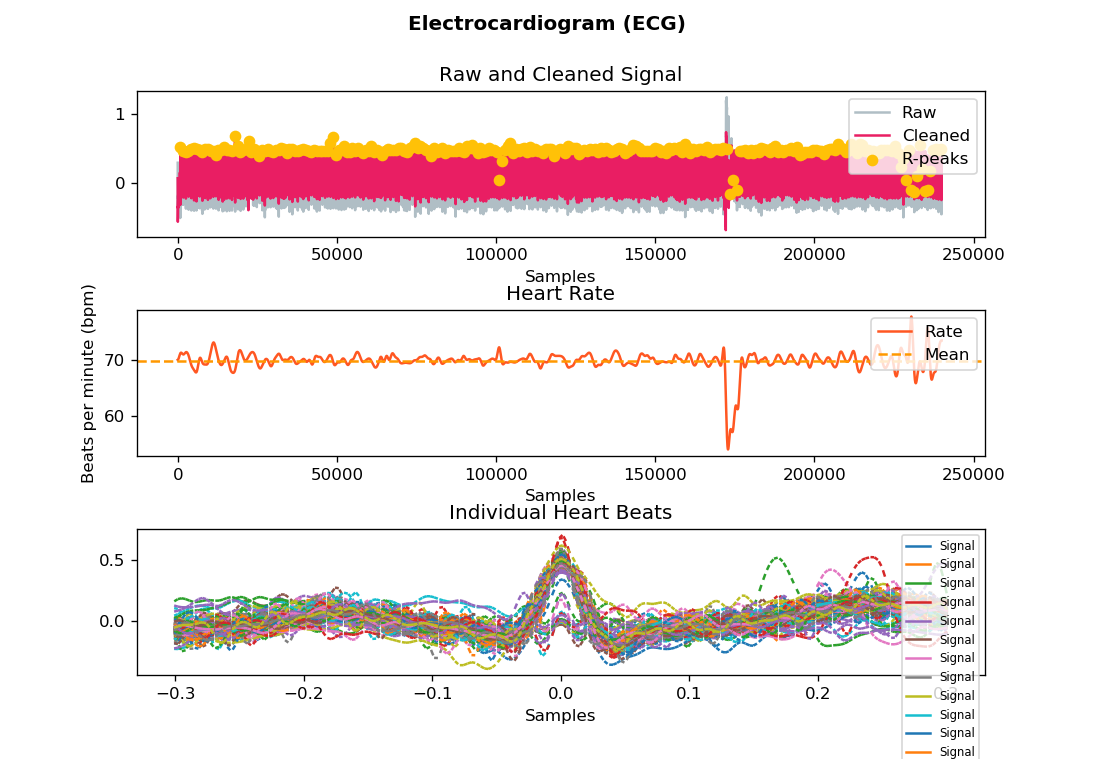

In [3]:
fig = nk.ecg_plot(signals)

# Optimal conditions

For the artifact correction to work optimally two conditions should be satisfied.

1. The ECG should not be too noisy: 
This is because the algorithm depends on some regularity in the detected R-peaks in order to detect outliers. I.e., the majority of the R-peaks needs to be detected correctly before the artifact correction is applied.
2. The ECG segments should be longer than approximately three minutes: This is because the algorithm determines thresholds based on sliding windows of 91 R-peaks.